In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

In [2]:
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [6]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
kickstarters_2017 = pd.read_csv("day2_dataset/kickstarter-projects/ks-projects-201801.csv")
# set seed for reproducibility
np.random.seed(0)

In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.

c:\users\dahan\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'scaled data')

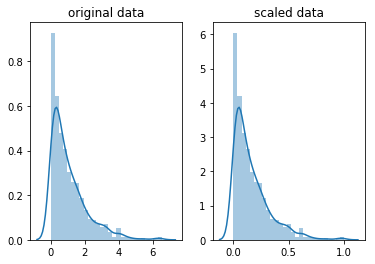

In [7]:
#generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
#mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])
#plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(scaled_data,ax = ax[1])
ax[1].set_title("scaled data")

Text(0.5, 1.0, 'scaled data')

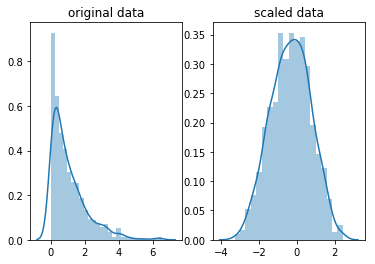

In [10]:
#normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
#plot both together to compare
fig,ax = plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(normalized_data[0],ax = ax[1])
ax[1].set_title("scaled data")

In [11]:
usd_goal = kickstarters_2017.usd_goal_real

Text(0.5, 1.0, 'scaled data')

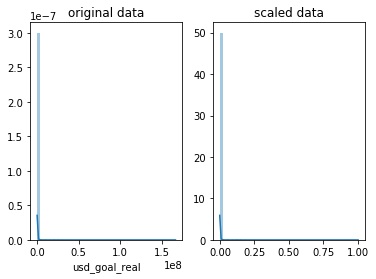

In [12]:
scaled_data = minmax_scaling(usd_goal,columns = [0])
fig,ax = plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(scaled_data,ax = ax[1])
ax[1].set_title("scaled data")

Text(0.5, 1.0, 'normalized data')

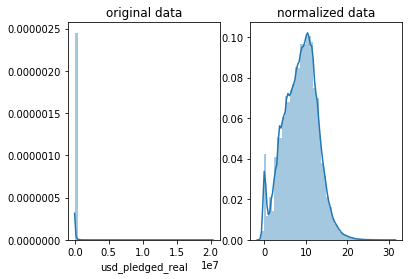

In [13]:
#get the index of all positive pledges
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
#get only positive pledges(using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]
#normalize the pledges
normalized_pledges = stats.boxcox(positive_pledges)[0]
fig,ax = plt.subplots(1,2)
sns.distplot(positive_pledges,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(normalized_pledges,ax = ax[1])
ax[1].set_title("normalized data")

In [14]:
kickstarters_2017.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
322023,709815585,"""Nobody Knows"" STOP ABUSE http://youtu.be/dmyI...",Music,Music,USD,2016-07-22,25000.0,2016-06-22 22:21:15,0.0,failed,0,US,0.00,0.00,25000.00
255285,368160581,Three Kiwi guys take on HOLY SHIP (Suspended),Documentary,Film & Video,AUD,2014-11-18,6000.0,2014-10-19 10:58:42,0.0,suspended,0,AU,0.00,0.00,5227.85
128774,1653810552,Eye2TV: Video Enhancement for Colour-Blind Peo...,Gadgets,Technology,GBP,2015-06-13,100000.0,2015-04-14 22:14:49,5091.0,canceled,59,GB,7443.43,8063.29,158383.22
26716,1135565248,"Cover Art for Justine Graykin's new book, ""Awa...",Illustration,Art,USD,2015-05-31,1000.0,2015-05-01 22:17:21,1066.0,successful,30,US,1066.00,1066.00,1000.00
206822,2053729268,The Seance - A Victorian Horror Novella,Fiction,Publishing,GBP,2014-08-22,200.0,2014-07-23 23:42:11,375.0,successful,26,GB,640.46,621.65,331.55


Text(0.5, 1.0, 'normalized data')

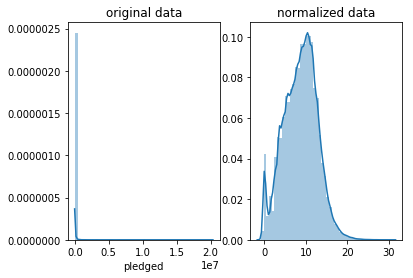

In [16]:
#normalization for pledges column
#get the index of all positive pledges
index_of_positive_pledges = kickstarters_2017.pledged > 0
#get only positive pledges(using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]
#normalize the pledges
normalized_pledges = stats.boxcox(positive_pledges)[0]
fig,ax = plt.subplots(1,2)
sns.distplot(pledges,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(normalized_pledges,ax = ax[1])
ax[1].set_title("normalized data")

Text(0.5, 1.0, 'scaled data')

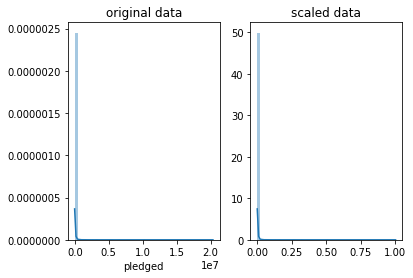

In [18]:
pledges = kickstarters_2017.pledged
#scaling for pledged columns
scaled_data = minmax_scaling(pledges,columns = [0])
fig,ax = plt.subplots(1,2)
sns.distplot(kickstarters_2017.pledged,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(scaled_data,ax = ax[1])
ax[1].set_title("scaled data")